In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
dir = '/content/drive/MyDrive/MiniProjectDataset'

categories = ['normal', 'smoking', 'spiting']

data = []

for c in categories:
  path = os.path.join(dir, c)
  label = categories.index(c)

  for img in os.listdir(path):
    imgpath = os.path.join(path, img)
    image = cv2.imread(imgpath, 0)

    try:
      image = cv2.resize(image, (224, 224))
      image = np.array(image).flatten()

      data.append([image, label])
    except Exception as e:
      pass







In [5]:
len(data)

2659

In [30]:
random.shuffle(data)
X = []
y = []

for feature,label in data:
  X.append(feature)
  y.append(label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [19]:


# Initialize classifiers
svm_classifier = svm.SVC(kernel = 'poly', C = 1, gamma = 'auto')
knn_classifier = KNeighborsClassifier(n_neighbors=3, n_jobs=1)
rf_classifier = RandomForestClassifier(n_estimators = 250)

# Train the models
svm_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)

# Predict using the models
svm_predictions = svm_classifier.predict(X_test)
knn_predictions = knn_classifier.predict(X_test)
rf_predictions = rf_classifier.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("SVM Accuracy:", svm_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

SVM Accuracy: 0.7794486215538847
KNN Accuracy: 0.6854636591478697
Random Forest Accuracy: 0.8145363408521303


In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
classes=label_encoder.classes_


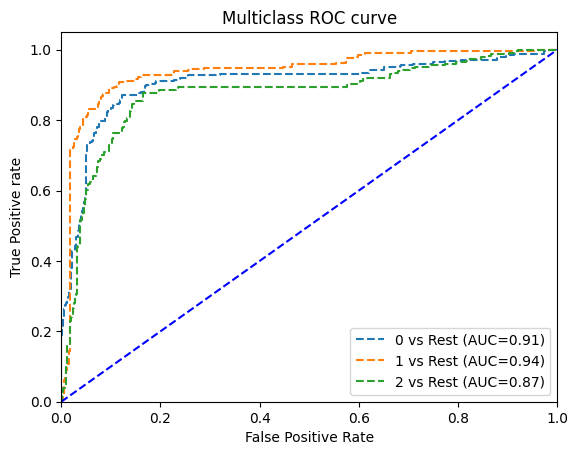

In [33]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Binarize the output
y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))


RF=OneVsRestClassifier(svm_classifier)
RF.fit(X_train,y_train)
y_pred =RF.predict(X_test)
y_score = RF.decision_function(X_test)


fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()


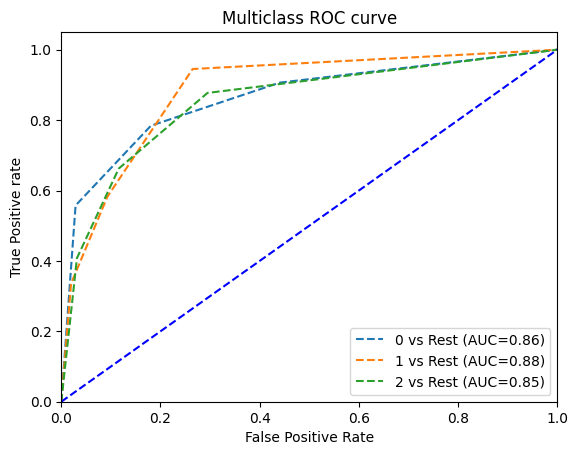

In [35]:
RF=OneVsRestClassifier(knn_classifier)
RF.fit(X_train,y_train)
y_pred =RF.predict(X_test)
y_score = RF.predict_proba(X_test)


fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

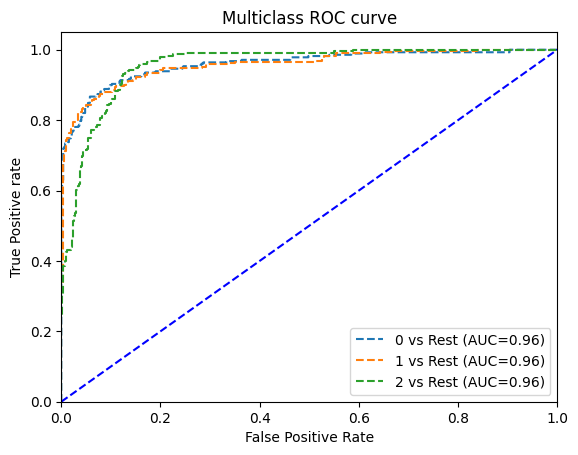

In [36]:
RF=OneVsRestClassifier(rf_classifier)
RF.fit(X_train,y_train)
y_pred =RF.predict(X_test)
y_score = RF.predict_proba(X_test)


fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()